# Assignment 2B
### Using Boosting, KNN, SVM

Dataset - 1 (Parkinsson Disease)

---
Data Aquisition
---

In [1]:
# Importing all neccessary libraries for EDA, Data Preprocessing and Model Building and hyperparameter tuning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [2]:
# Importing the dataset

parkinsons_data = pd.read_csv('parkinsson_disease.csv')

---
## EDA
---
### Data Understanding

In [3]:
# Data Understanding

# Checking the first 5 rows of the dataset
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# Describing the dataset
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,154.19014,192.905336,111.228696,0.006721,0.000048,0.003548,0.003912,0.010637,0.031452,0.311788,...,0.050799,0.027357,21.753236,0.772000,0.500531,0.725576,-5.424871,0.235523,2.380643,0.225238
std,41.05497,83.027912,41.138549,0.004879,0.000034,0.002946,0.003000,0.008837,0.019205,0.209333,...,0.030822,0.040969,4.121719,0.420384,0.099490,0.064984,1.147494,0.084092,0.351116,0.100546
min,88.33300,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,118.67000,139.660500,83.204250,0.003840,0.000030,0.001765,0.002030,0.005298,0.017530,0.161500,...,0.026540,0.006865,19.582250,1.000000,0.431865,0.665861,-6.273135,0.183218,2.137458,0.147761
50%,148.11650,166.172500,96.543000,0.005735,0.000040,0.002970,0.003165,0.008905,0.024670,0.236000,...,0.041600,0.015000,22.000000,1.000000,0.481117,0.725934,-5.467201,0.223290,2.352825,0.204568
75%,192.81800,216.686000,121.211000,0.007770,0.000060,0.004010,0.004685,0.011980,0.041000,0.430750,...,0.069637,0.029110,24.596750,1.000000,0.595627,0.775178,-4.557822,0.299948,2.559700,0.296424
max,260.10500,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.850000,-2.434031,0.450493,3.671155,0.527367


In [5]:
# Shape of the dataset
parkinsons_data.shape

(250, 24)

In [6]:
# Checking for missing values
print(parkinsons_data.isnull().sum())


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [7]:
# Checking the datatypes of the columns
parkinsons_data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [8]:
# Dropping the unnecessary columns which are not required for model building
parkinsons_data = parkinsons_data.drop(['name'], axis = 1)

parkinsons_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
parkinsons_data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.439252,0.541557,-0.092998,-0.356948,-0.029498,-0.150741,-0.030592,-0.147243,-0.154359,...,-0.167949,0.089101,0.021753,-0.394460,-0.173660,-0.561175,-0.378193,-0.327844,0.210119,-0.429713
MDVP:Fhi(Hz),0.439252,1.000000,0.114710,0.071124,-0.069355,0.085126,0.016697,0.084872,-0.044131,-0.032268,...,-0.065731,0.180449,-0.033077,-0.204614,-0.049360,-0.382405,-0.133174,-0.075279,0.190508,-0.155317
MDVP:Flo(Hz),0.541557,0.114710,1.000000,-0.091242,-0.253047,-0.045166,-0.083323,-0.044877,-0.106166,-0.109826,...,-0.144966,-0.013185,0.138917,-0.400465,-0.312610,-0.140347,-0.414361,-0.256013,-0.039381,-0.344658
MDVP:Jitter(%),-0.092998,0.071124,-0.091242,1.000000,0.929371,0.988648,0.960403,0.988782,0.809710,0.827931,...,0.778277,0.871975,-0.741552,0.177585,0.320487,0.163084,0.673385,0.439924,0.439144,0.686884
MDVP:Jitter(Abs),-0.356948,-0.069355,-0.253047,0.929371,1.000000,0.908517,0.896819,0.908584,0.749775,0.761344,...,0.747007,0.763833,-0.658253,0.298889,0.375835,0.264493,0.738096,0.456829,0.316064,0.737696
MDVP:RAP,-0.029498,0.085126,-0.045166,0.988648,0.908517,1.000000,0.927286,0.999987,0.785261,0.792144,...,0.754468,0.899498,-0.742215,0.158140,0.329803,0.086550,0.616520,0.362957,0.444371,0.613091
MDVP:PPQ,-0.150741,0.016697,-0.083323,0.960403,0.896819,0.927286,1.000000,0.927665,0.847076,0.888733,...,0.819831,0.758943,-0.705187,0.201911,0.236135,0.337847,0.724650,0.509131,0.384907,0.782432
Jitter:DDP,-0.030592,0.084872,-0.044877,0.988782,0.908584,0.999987,0.927665,1.000000,0.785718,0.792651,...,0.754911,0.899418,-0.742381,0.157705,0.328674,0.087878,0.616210,0.363599,0.444173,0.613703
MDVP:Shimmer,-0.147243,-0.044131,-0.106166,0.809710,0.749775,0.785261,0.847076,0.785718,1.000000,0.983071,...,0.984776,0.673028,-0.805741,0.285576,0.344002,0.294094,0.660771,0.532897,0.479743,0.715447
MDVP:Shimmer(dB),-0.154359,-0.032268,-0.109826,0.827931,0.761344,0.792144,0.888733,0.792651,0.983071,1.000000,...,0.968247,0.659895,-0.769083,0.274594,0.280326,0.353381,0.687114,0.558740,0.453815,0.752804


In [10]:
# Renaming the column names

parkinsons_data = parkinsons_data.rename(columns = {'MDVP:Fo(Hz)':'Fo (Hz)', 'MDVP:Fhi(Hz)':'Fhi (Hz)', 'MDVP:Flo(Hz)':'Flo (Hz)', 'MDVP:Jitter(%)':'Jitter (%)', 'MDVP:Jitter(Abs)':'Jitter (Abs)', 'MDVP:RAP':'RAP', 'MDVP:PPQ':'PPQ', 'Jitter:DDP':'DDP', 'MDVP:Shimmer':'Shimmer', 'MDVP:Shimmer(dB)':'Shimmer (dB)', 'Shimmer:APQ3':'APQ3', 'Shimmer:APQ5':'APQ5', 'MDVP:APQ':'APQ', 'Shimmer:DDA':'DDA'})

parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fo (Hz)       250 non-null    float64
 1   Fhi (Hz)      250 non-null    float64
 2   Flo (Hz)      250 non-null    float64
 3   Jitter (%)    250 non-null    float64
 4   Jitter (Abs)  250 non-null    float64
 5   RAP           250 non-null    float64
 6   PPQ           250 non-null    float64
 7   DDP           250 non-null    float64
 8   Shimmer       250 non-null    float64
 9   Shimmer (dB)  250 non-null    float64
 10  APQ3          250 non-null    float64
 11  APQ5          250 non-null    float64
 12  APQ           250 non-null    float64
 13  DDA           250 non-null    float64
 14  NHR           250 non-null    float64
 15  HNR           250 non-null    float64
 16  status        250 non-null    int64  
 17  RPDE          250 non-null    float64
 18  DFA           250 non-null    

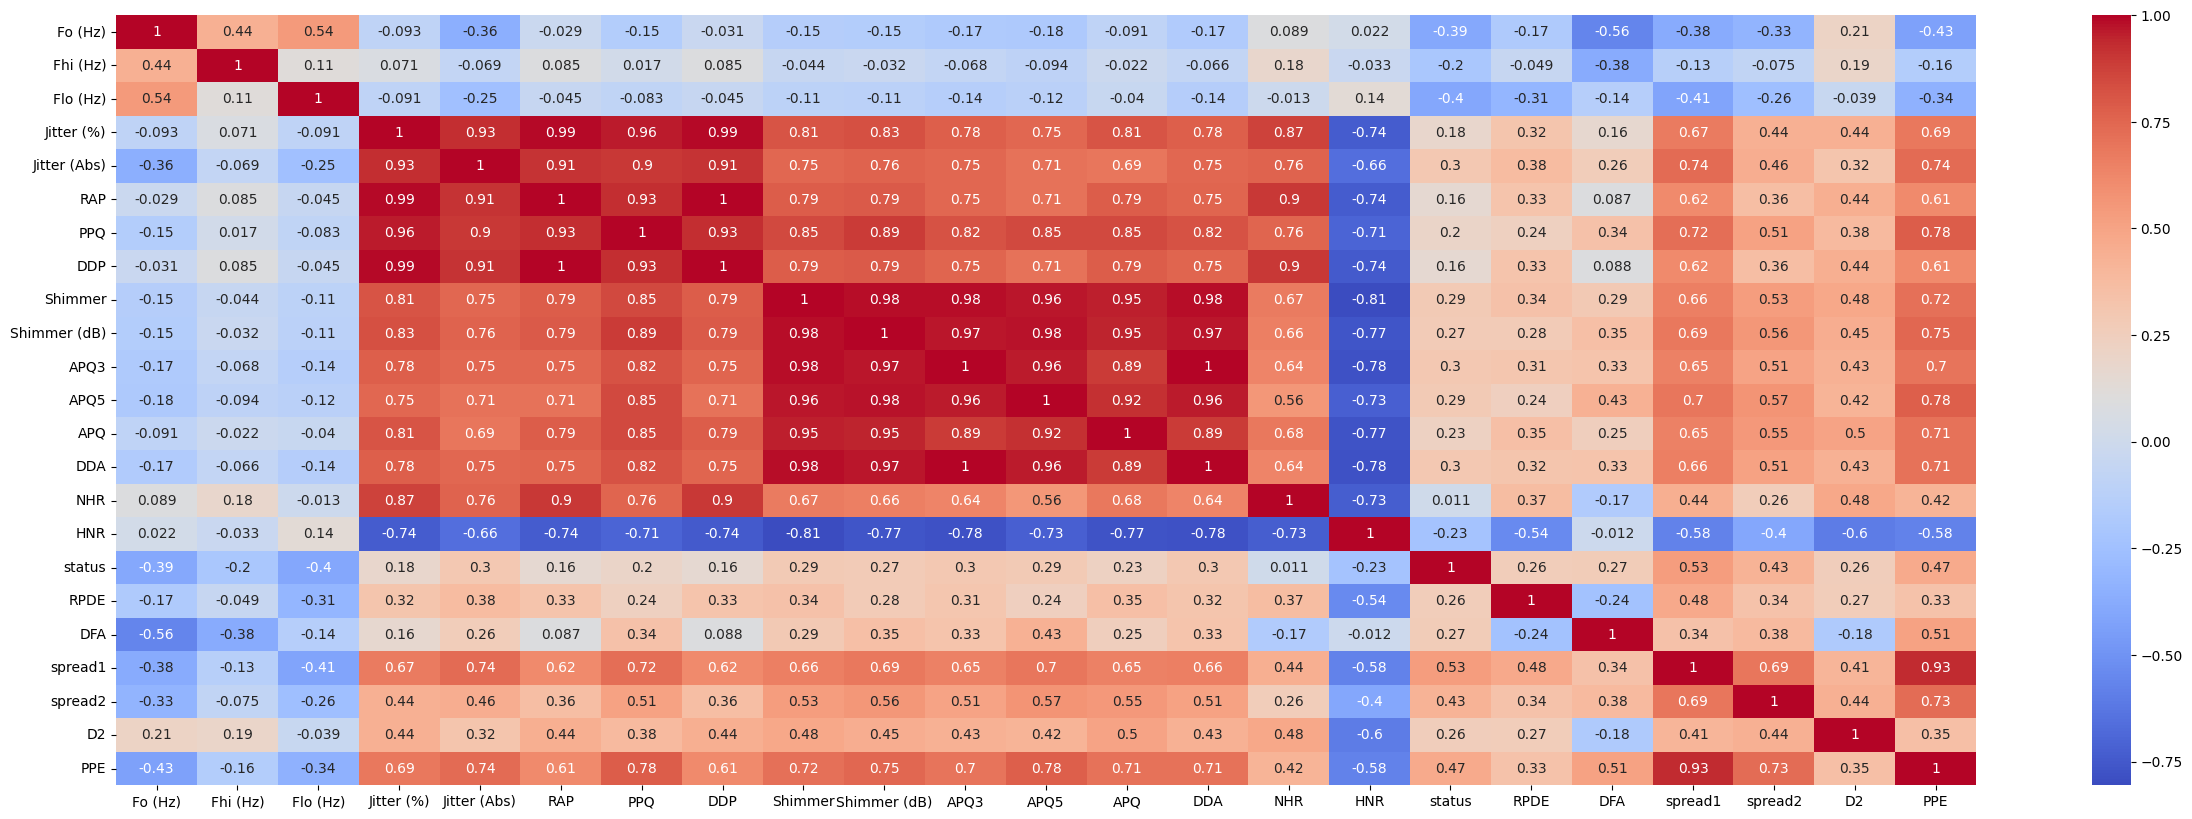

,Fo (Hz),Fhi (Hz),Flo (Hz),Jitter (%),Jitter (Abs),RAP,PPQ,DDP,Shimmer,Shimmer (dB),...,DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
Fo (Hz),1.000000,0.439252,0.541557,-0.092998,-0.356948,-0.029498,-0.150741,-0.030592,-0.147243,-0.154359,...,-0.167949,0.089101,0.021753,-0.394460,-0.173660,-0.561175,-0.378193,-0.327844,0.210119,-0.429713
Fhi (Hz),0.439252,1.000000,0.114710,0.071124,-0.069355,0.085126,0.016697,0.084872,-0.044131,-0.032268,...,-0.065731,0.180449,-0.033077,-0.204614,-0.049360,-0.382405,-0.133174,-0.075279,0.190508,-0.155317
Flo (Hz),0.541557,0.114710,1.000000,-0.091242,-0.253047,-0.045166,-0.083323,-0.044877,-0.106166,-0.109826,...,-0.144966,-0.013185,0.138917,-0.400465,-0.312610,-0.140347,-0.414361,-0.256013,-0.039381,-0.344658
Jitter (%),-0.092998,0.071124,-0.091242,1.000000,0.929371,0.988648,0.960403,0.988782,0.809710,0.827931,...,0.778277,0.871975,-0.741552,0.177585,0.320487,0.163084,0.673385,0.439924,0.439144,0.686884
Jitter (Abs),-0.356948,-0.069355,-0.253047,0.929371,1.000000,0.908517,0.896819,0.908584,0.749775,0.761344,...,0.747007,0.763833,-0.658253,0.298889,0.375835,0.264493,0.738096,0.456829,0.316064,0.737696
RAP,-0.029498,0.085126,-0.045166,0.988648,0.908517,1.000000,0.927286,0.999987,0.785261,0.792144,...,0.754468,0.899498,-0.742215,0.158140,0.329803,0.086550,0.616520,0.362957,0.444371,0.613091
PPQ,-0.150741,0.016697,-0.083323,0.960403,0.896819,0.927286,1.000000,0.927665,0.847076,0.888733,...,0.819831,0.758943,-0.705187,0.201911,0.236135,0.337847,0.724650,0.509131,0.384907,0.782432
DDP,-0.030592,0.084872,-0.044877,0.988782,0.908584,0.999987,0.927665,1.000000,0.785718,0.792651,...,0.754911,0.899418,-0.742381,0.157705,0.328674,0.087878,0.616210,0.363599,0.444173,0.613703
Shimmer,-0.147243,-0.044131,-0.106166,0.809710,0.749775,0.785261,0.847076,0.785718,1.000000,0.983071,...,0.984776,0.673028,-0.805741,0.285576,0.344002,0.294094,0.660771,0.532897,0.479743,0.715447
Shimmer (dB),-0.154359,-0.032268,-0.109826,0.827931,0.761344,0.792144,0.888733,0.792651,0.983071,1.000000,...,0.968247,0.659895,-0.769083,0.274594,0.280326,0.353381,0.687114,0.558740,0.453815,0.752804


In [11]:
# Correlation matrix
correlation = parkinsons_data.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(30,10))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.show()

parkinsons_data.corr()

# Data Visulization

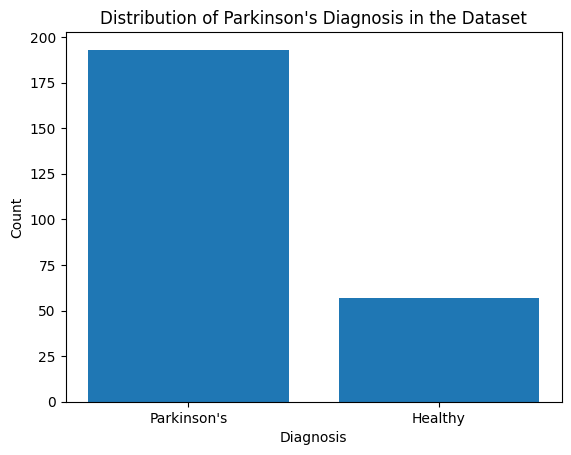

In [12]:
# Count the number of individuals with and without Parkinson's disease
parkinson_count = parkinsons_data["status"].value_counts()[1]  # Count for Parkinson's (1)
healthy_count = parkinsons_data["status"].value_counts()[0]  # Count for Healthy (0)

# Create a bar chart to visualize the counts
plt.bar(["Parkinson's", "Healthy"], [parkinson_count, healthy_count])
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Distribution of Parkinson's Diagnosis in the Dataset")
plt.show()

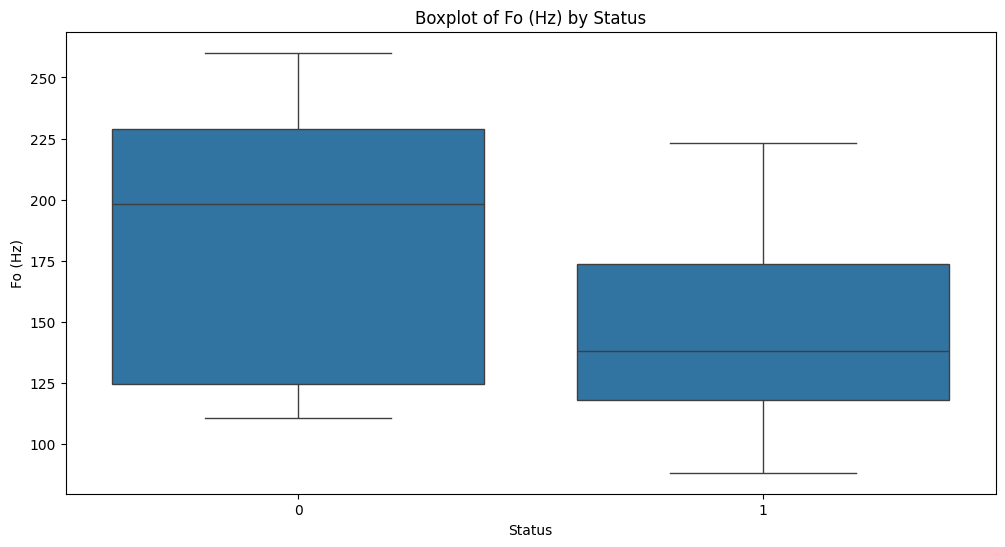

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='status', y='Fo (Hz)', data=parkinsons_data)
plt.title('Boxplot of Fo (Hz) by Status')
plt.xlabel('Status')
plt.ylabel('Fo (Hz)')
plt.show()

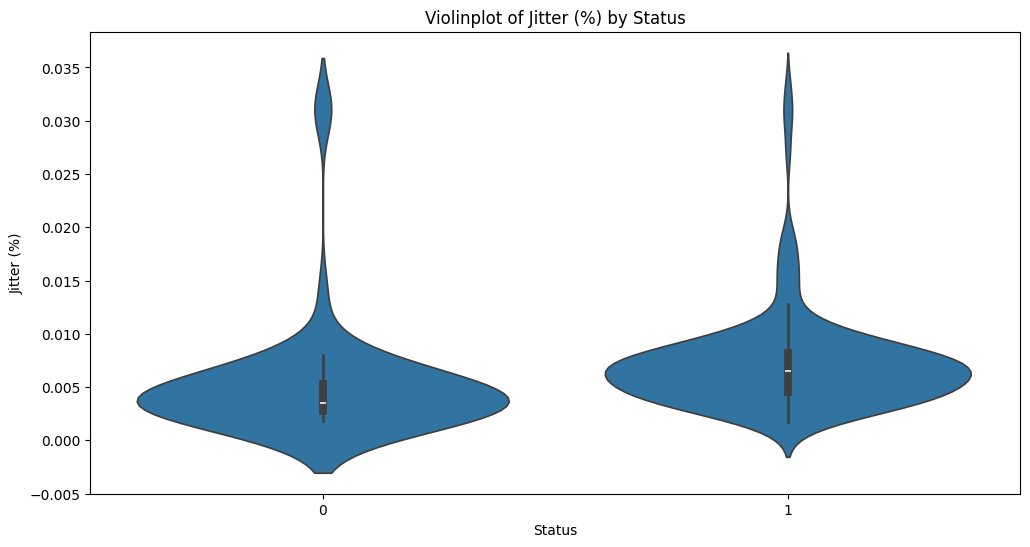

In [14]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='status', y='Jitter (%)', data=parkinsons_data)
plt.title('Violinplot of Jitter (%) by Status')
plt.xlabel('Status')
plt.ylabel('Jitter (%)')
plt.show()

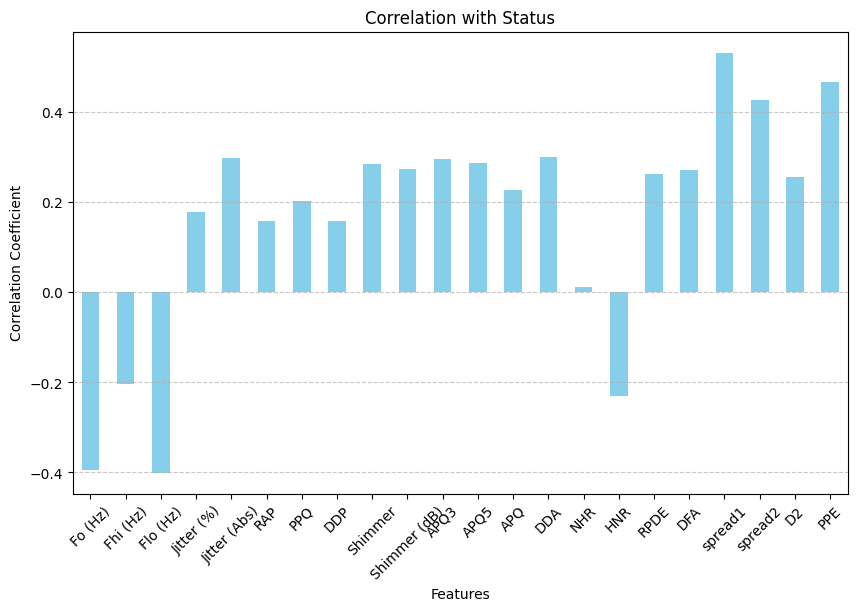

In [15]:
corr_with_status = parkinsons_data.corr()['status'].drop('status')
corr_with_status.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Correlation with Status')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

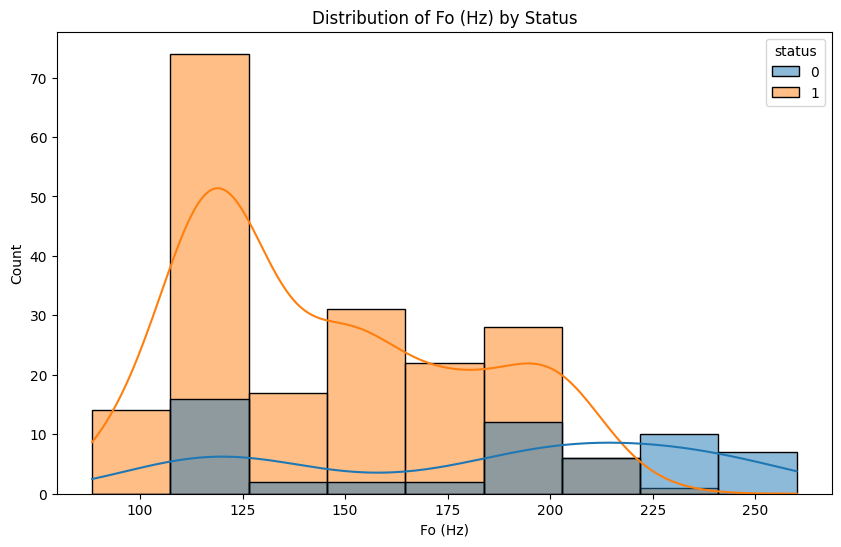

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=parkinsons_data, x='Fo (Hz)', hue='status', kde=True)
plt.title('Distribution of Fo (Hz) by Status')
plt.xlabel('Fo (Hz)')
plt.ylabel('Count')
plt.show()

# Data Preprocessing

In [17]:
# Splitting the dataset into dependent and independent variables
x = parkinsons_data.drop(columns=['status'])
y = parkinsons_data['status']

# Standardizing the dataset
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

# Splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = 0.2, random_state = 0)

## KNN Implementation

In [18]:
# Importing KNN 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score

# KNN Model
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)


# Other Metrics
print('F1 Score:', f1_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))


Accuracy Score: 0.96
F1 Score: 0.975
Precision Score: 0.9512195121951219
Recall Score: 1.0
ROC AUC Score: 0.9090909090909091


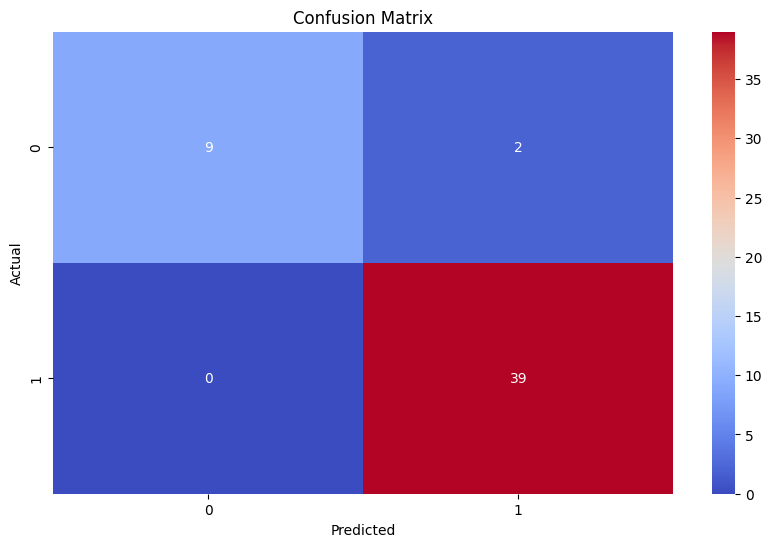

In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot = True, cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [20]:
# Confusion Matrix in words
print(conf_matrix)

[[ 9  2]
 [ 0 39]]


In [21]:
max_k = 12
f1_scores = []
error_rates = []
accuracies = []

for k in range(1, max_k+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)
    accuracies.append(accuracy_score(y_test, y_pred))


f1_results = pd.DataFrame({'k': range(1, max_k+1), 'F1 Score': f1_scores})
error_results = pd.DataFrame({'k': range(1, max_k+1), 'Error Rate': error_rates})
accuracy_results = pd.DataFrame({'k': range(1, max_k+1), 'Accuracy': accuracies})

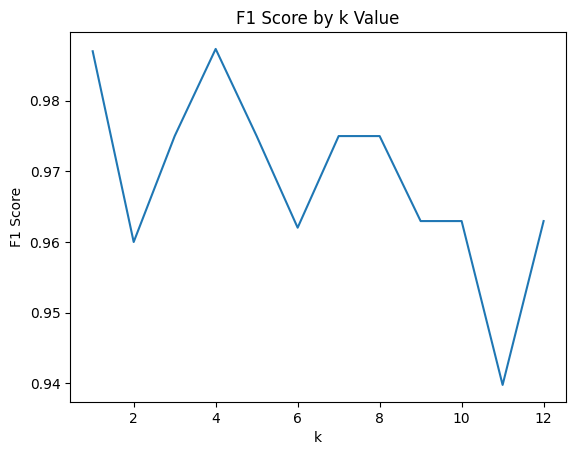

In [22]:
# Plotting the k value vs f1 score

sns.lineplot(x='k', y='F1 Score', data=f1_results)
plt.title('F1 Score by k Value')
plt.show()


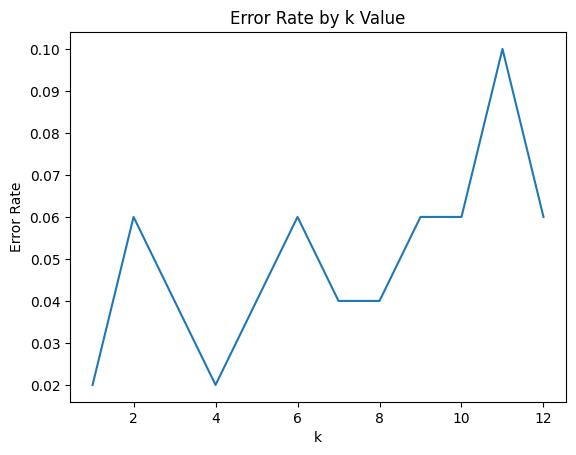

In [23]:
# Plotting the k value vs error rate

sns.lineplot(x='k', y='Error Rate', data=error_results)
plt.title('Error Rate by k Value')
plt.show()


In [24]:
print(f1_results , "\n")

print(error_results)

     k  F1 Score
0    1  0.987013
1    2  0.960000
2    3  0.975000
3    4  0.987342
4    5  0.975000
5    6  0.962025
6    7  0.975000
7    8  0.975000
8    9  0.962963
9   10  0.962963
10  11  0.939759
11  12  0.962963 

     k  Error Rate
0    1        0.02
1    2        0.06
2    3        0.04
3    4        0.02
4    5        0.04
5    6        0.06
6    7        0.04
7    8        0.04
8    9        0.06
9   10        0.06
10  11        0.10
11  12        0.06


In [25]:
# KNN Model with the best k value
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred), "\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.98 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.97      1.00      0.99        39

    accuracy                           0.98        50
   macro avg       0.99      0.95      0.97        50
weighted avg       0.98      0.98      0.98        50



Confusion Matrix:
[[10  1]
 [ 0 39]]


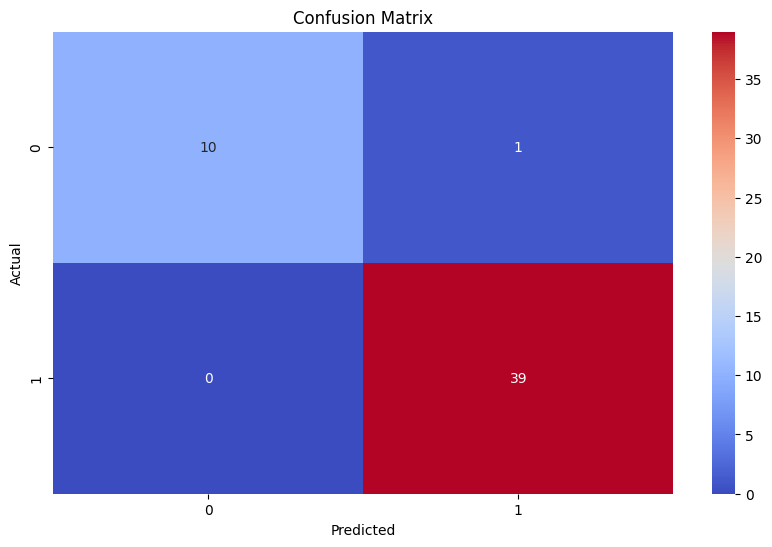

In [26]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [27]:
# Other Evaluation metrics
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print('F1 Score:', f1)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


F1 Score: 0.9873417721518988
Accuracy: 0.98
Precision: 0.975
Recall: 1.0


## SVM implementation

In [28]:
# Importing SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [29]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

In [30]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred), "\n")
print("Recall:", recall_score(y_test, y_pred), "\n")
print("Precision:", precision_score(y_test, y_pred), "\n")
print("F1 Score:", f1_score(y_test, y_pred), "\n")

Accuracy: 0.92 

Recall: 1.0 

Precision: 0.9069767441860465 

F1 Score: 0.9512195121951219 



[[ 7  4]
 [ 0 39]]


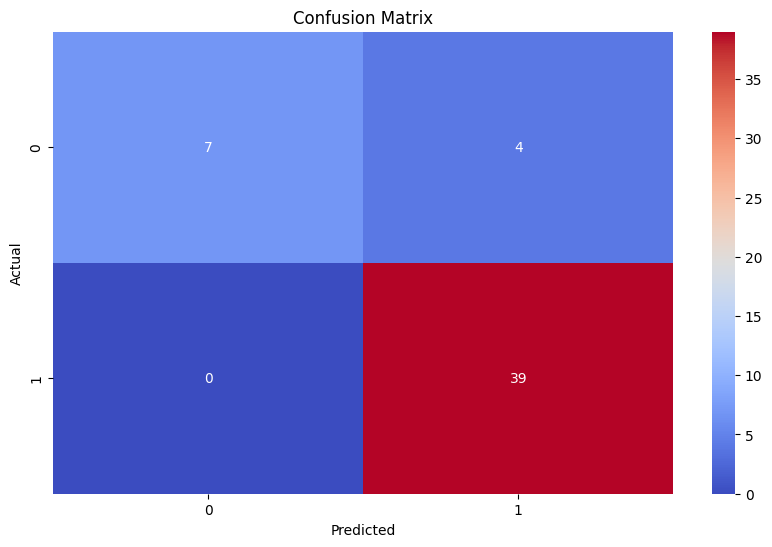

In [31]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot = True, cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

# Create a dictionary of hyperparameters
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': kernel}

# Create a GridSearchCV object

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# Fit the model
grid.fit(x_train, y_train)

# Print the best hyperparameters
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(x_test)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.925 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.825 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.875 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.850 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.925 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.850 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.775 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.875 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.775 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

In [33]:
# Model Evaluation

print("Accuracy:", accuracy_score(y_test, grid_predictions), "\n")
print("Recall:", recall_score(y_test, grid_predictions), "\n")
print("Precision:", precision_score(y_test, grid_predictions), "\n")
print("F1 Score:", f1_score(y_test, grid_predictions), "\n")

Accuracy: 0.96 

Recall: 0.9743589743589743 

Precision: 0.9743589743589743 

F1 Score: 0.9743589743589743 



In [34]:
# Comparing differnt kernel models' metrics

accuracies = []
precisions = []
recalls = []
f1_scores = []


for s in kernel:
    model = SVC(kernel = s)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

    

In [35]:
# Create a dataframe of the metrics
svm_metrics = pd.DataFrame({'Kernel': kernel, 'Accuracy': accuracies, 'Precision': precisions, 'Recall': recalls, 'F1 Score': f1_scores})

print(svm_metrics)

    Kernel  Accuracy  Precision    Recall  F1 Score
0   linear      0.90   0.904762  0.974359  0.938272
1     poly      0.92   0.906977  1.000000  0.951220
2      rbf      0.92   0.906977  1.000000  0.951220
3  sigmoid      0.86   0.900000  0.923077  0.911392


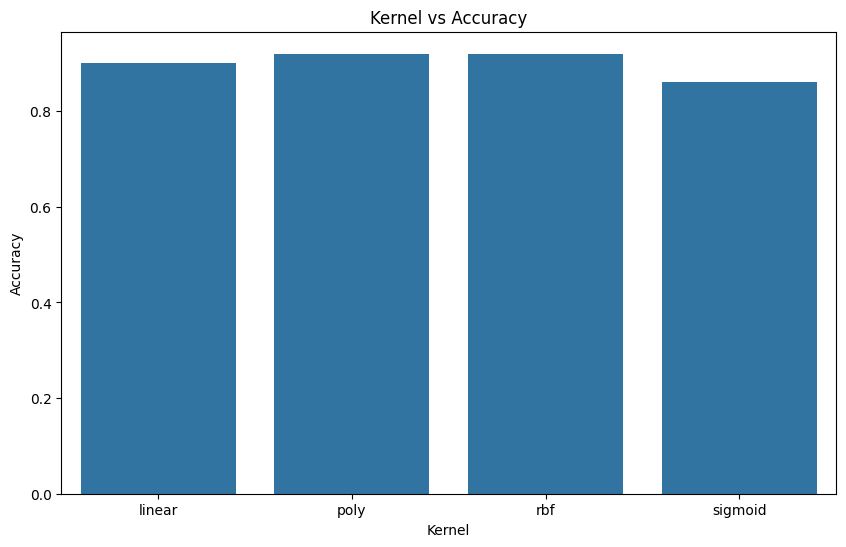

In [36]:
# Plotting a bar chart of the kernel vs the accuracy

plt.figure(figsize=(10, 6))
sns.barplot(x='Kernel', y='Accuracy', data=svm_metrics)
plt.title('Kernel vs Accuracy')
plt.show()


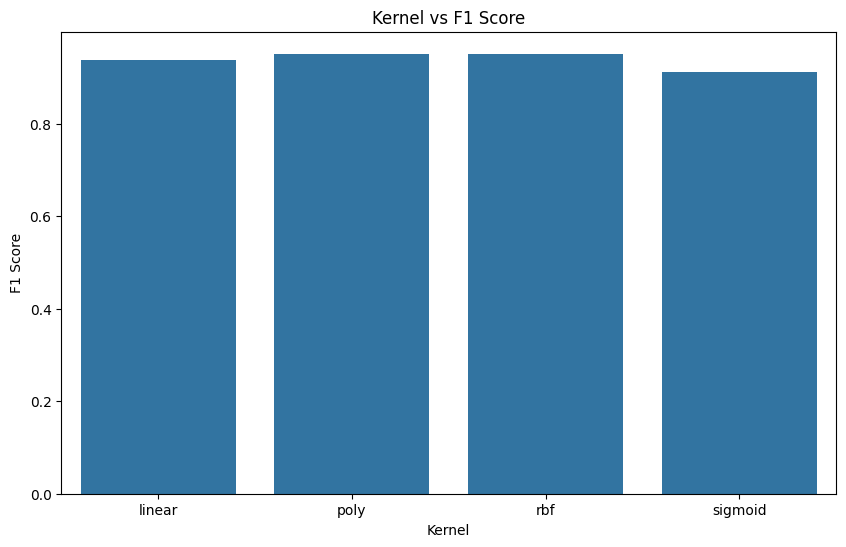

In [37]:
# Plotting a bar chart of the kernel vs the f1 score

plt.figure(figsize=(10, 6))
sns.barplot(x='Kernel', y='F1 Score', data=svm_metrics)
plt.title('Kernel vs F1 Score')
plt.show()

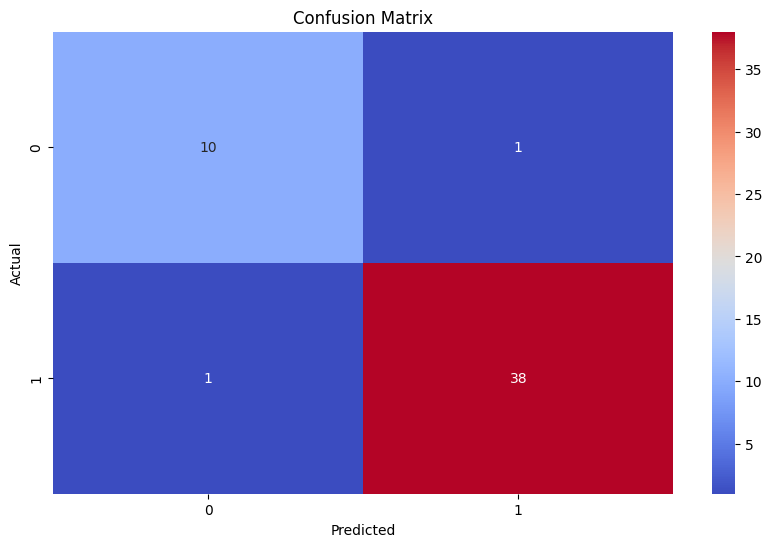

In [38]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, grid_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot = True, cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## XGBoost Implementation

In [39]:
# importing XGBoostClassifier

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import xgboost as xgb

# XGBoost Model with decision tree as base learner
xgb_model = XGBClassifier(objective="binary:logistic", booster="gbtree",  n_estimators=50, eta=0.1, max_depth=3)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)


Accuracy: 0.98
Recall: 1.0
Precision: 0.975
F1 Score: 0.9873417721518988
Confusion Matrix:
[[10  1]
 [ 0 39]]


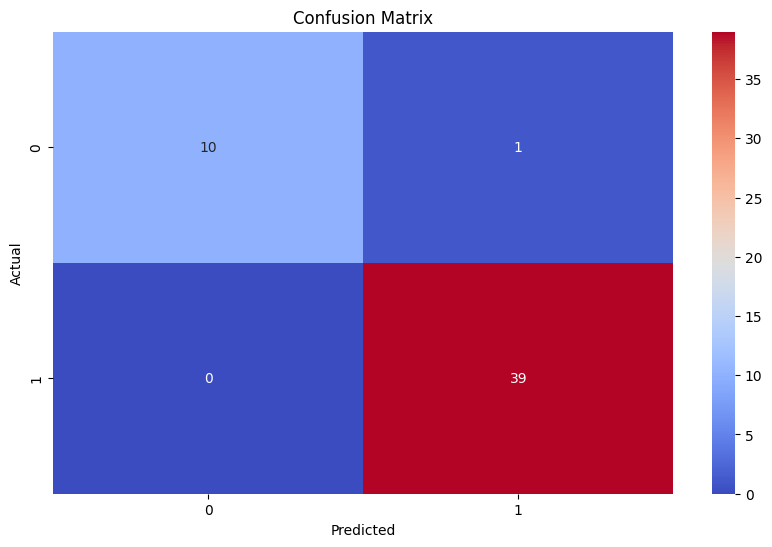

In [40]:
# Model Evaluation - Before Hyperparameter Tuning
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [41]:
# Hyperparameter Tuning

# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create a dictionary of hyperparameters
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "learning_rate": [0.1, 0.3, 0.5],  # Learning rate
    "max_depth": [3, 5, 8],  # Maximum depth of trees
    "min_child_weight": [1, 3, 5],  # Pruning parameter: Minimum samples per leaf
}

# Create a GridSearchCV object
grid = GridSearchCV(XGBClassifier(objective="binary:logistic", booster="gbtree"), param_grid, refit = True, verbose = 3)

# Fit the model
grid.fit(x_train, y_train)

# Print the best hyperparameters
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(x_test)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50;, score=0.975 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50;, score=0.925 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50;, score=0.975 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50;, score=0.725 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50;, score=0.900 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100;, score=0.975 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100;, score=0.925 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100;, score=0.975 total time=   0.0s
[CV 4/5] END learning_r

Accuracy: 0.96
Recall: 0.9743589743589743
Precision: 0.9743589743589743
F1 Score: 0.9743589743589743
Confusion Matrix:
[[10  1]
 [ 1 38]]


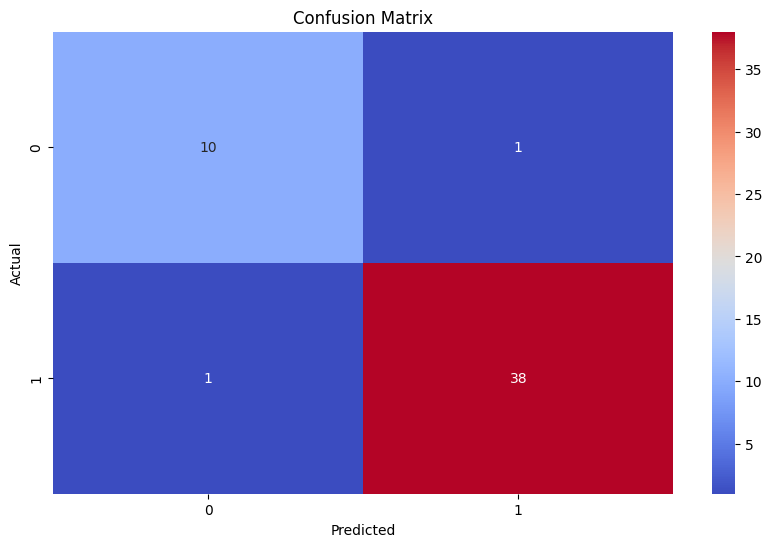

In [42]:
# Model Evaluation - After Hyperparameter Tuning
print("Accuracy:", accuracy_score(y_test, grid_predictions))
print("Recall:", recall_score(y_test, grid_predictions))
print("Precision:", precision_score(y_test, grid_predictions))
print("F1 Score:", f1_score(y_test, grid_predictions))
print("Confusion Matrix:")

print(confusion_matrix(y_test, grid_predictions))

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, grid_predictions), annot = True, cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


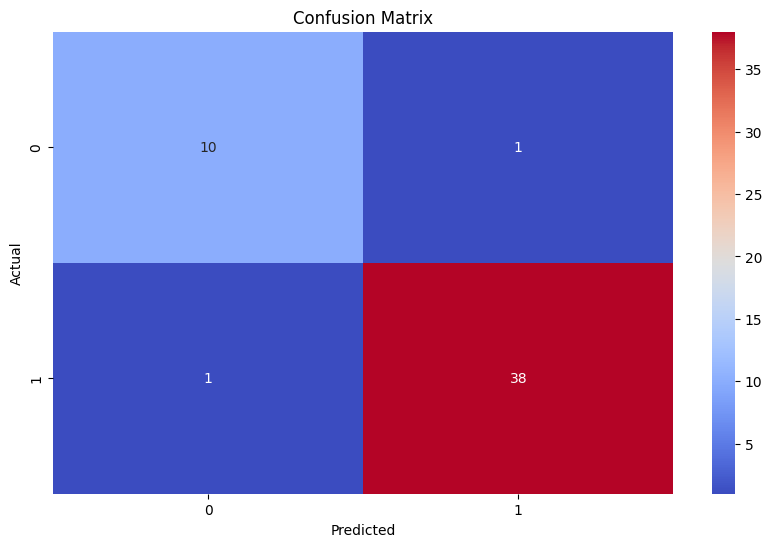

In [43]:

# Confusion Matrix

conf_matrix = confusion_matrix(y_test, grid_predictions)

# Plotting the confusion matrix

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot = True, cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


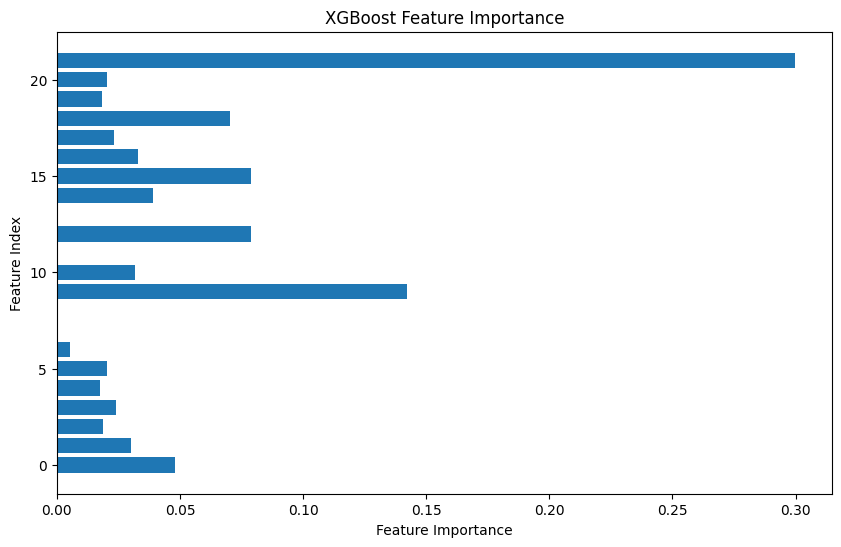

Feature Importance: [0.04784762 0.03025224 0.01866885 0.02400247 0.01749602 0.02045301
 0.00541713 0.         0.         0.14231804 0.0317626  0.
 0.07900274 0.         0.03916163 0.07887191 0.032822   0.02319355
 0.07010899 0.01831007 0.02053269 0.29977837]


In [44]:
# Access the best estimator
best_model = grid.best_estimator_

# Get feature importance
feature_importance = best_model.feature_importances_

# Get feature names or indices if using NumPy array
feature_names = np.arange(x_train.shape[1])  # Assuming features are represented by indices

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Index")
plt.title("XGBoost Feature Importance")
plt.show()

print("Feature Importance:", feature_importance)

### Titanic Dataset


In [45]:
# Importing all neccessary libraries for EDA, Data Preprocessing and Model Building and hyperparameter tuning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [46]:
# Importing the dataset

data = pd.read_csv('Titanic_Dataset.csv')


### Data Understanding

In [47]:
# Data Understanding

# Checking the first 5 rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
# Checking for missing values
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [51]:
# Handle missing values and categorical data (split this into multiple boxes)
data.dropna(subset=['Age', 'Embarked'], inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
# Drop the columns that are not required for model building
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

In [52]:
# Split data into training and testing sets (split this into multiple boxes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int64  
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.1 KB


# Data visualization

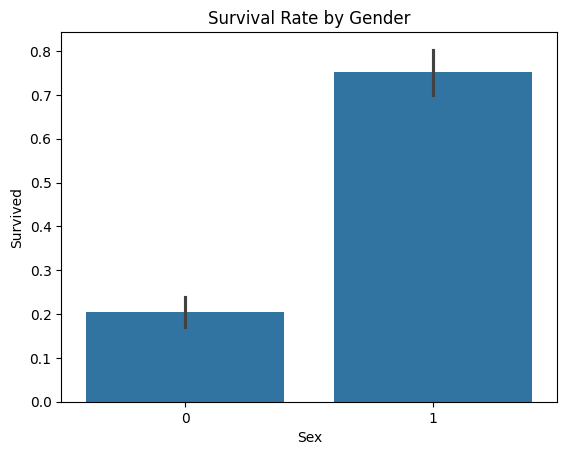

In [54]:
# Survived by Sex vs survived
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()

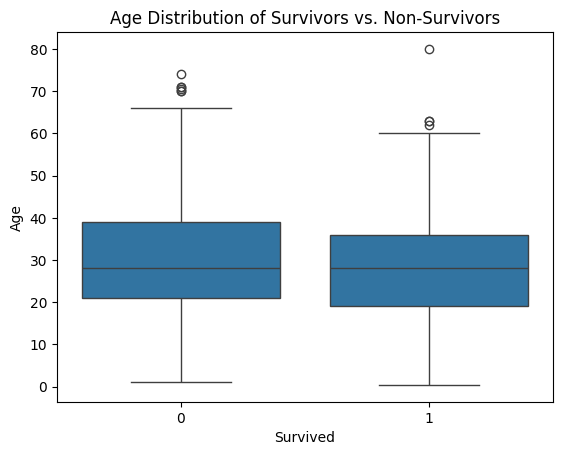

In [55]:
# Age by Survived
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.show()


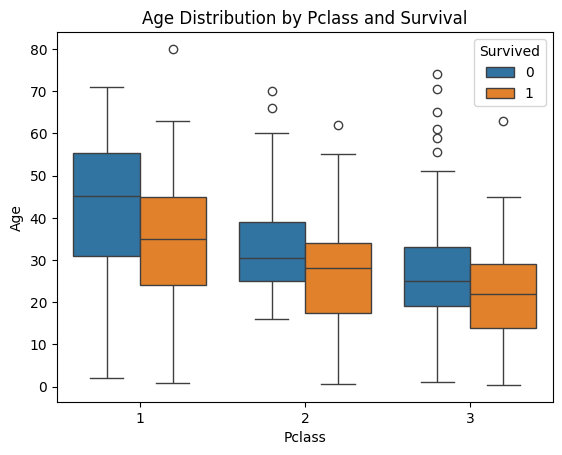

In [56]:
# Embarked vs PClass
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=data)
plt.title('Age Distribution by Pclass and Survival')
plt.show()

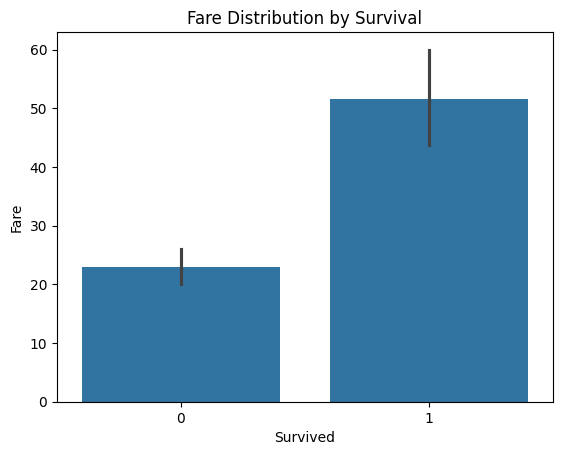

In [57]:
sns.barplot(x='Survived', y='Fare', data=data)
plt.title('Fare Distribution by Survival')
plt.show()

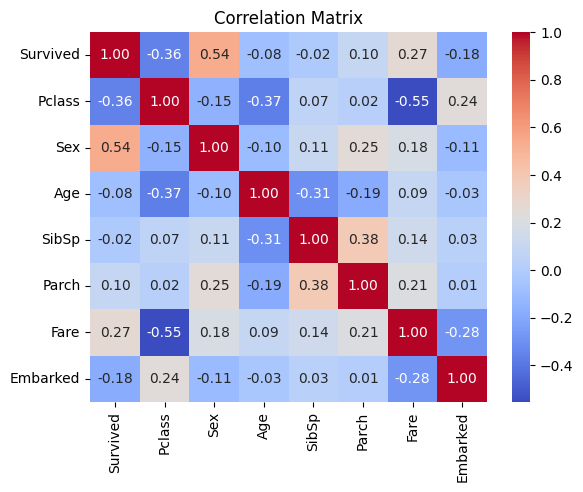

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.356462,0.536762,-0.082446,-0.015523,0.095265,0.266100,-0.181979
Pclass,-0.356462,1.000000,-0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145
Sex,0.536762,-0.150826,1.000000,-0.099037,0.106296,0.249543,0.182457,-0.109639
Age,-0.082446,-0.365902,-0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565
SibSp,-0.015523,0.065187,0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064
Parch,0.095265,0.023666,0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803
Fare,0.266100,-0.552893,0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510
Embarked,-0.181979,0.244145,-0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000


In [58]:
# Correlation Matrix
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

data.corr()

## KNN Implementation

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score


# KNN Model

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

# Other Metricsq
print('F1 Score:', f1_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))




Accuracy Score: 0.7832167832167832
F1 Score: 0.7256637168141593
Precision Score: 0.82
Recall Score: 0.6507936507936508


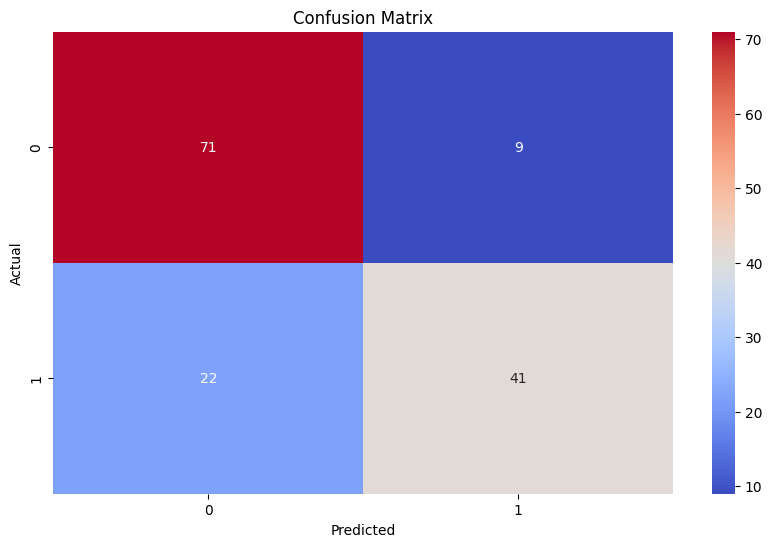

In [60]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot = True, cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [61]:
# Confusion Matrix in words
print(conf_matrix)

[[71  9]
 [22 41]]


In [62]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

F1 Score: 0.7256637168141593


In [63]:
max_k = 12
f1_scores = []
error_rates = []
accuracies = []

for k in range(1, max_k+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)
    accuracies.append(accuracy_score(y_test, y_pred))


f1_results = pd.DataFrame({'k': range(1, max_k+1), 'F1 Score': f1_scores})
error_results = pd.DataFrame({'k': range(1, max_k+1), 'Error Rate': error_rates})
accuracy_results = pd.DataFrame({'k': range(1, max_k+1), 'Accuracy': accuracies})

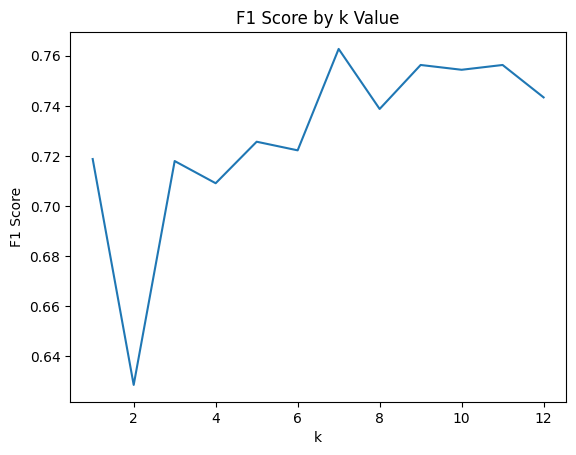

In [64]:
# Plotting the k value vs f1 score

sns.lineplot(x='k', y='F1 Score', data=f1_results)
plt.title('F1 Score by k Value')
plt.show()

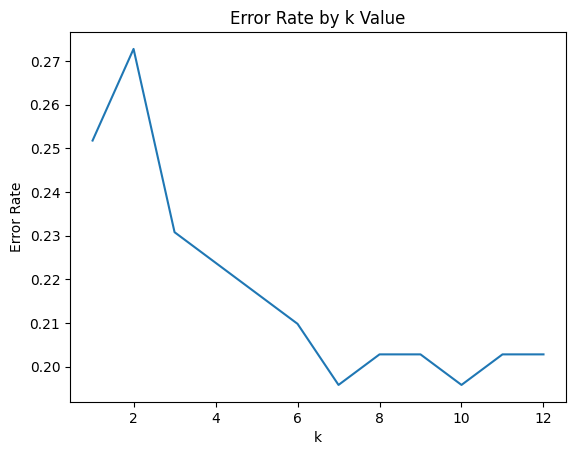

In [65]:
# Plotting the k value vs error rate

sns.lineplot(x='k', y='Error Rate', data=error_results)
plt.title('Error Rate by k Value')
plt.show()


In [66]:
print(f1_results , "\n")

print(error_results)

     k  F1 Score
0    1  0.718750
1    2  0.628571
2    3  0.717949
3    4  0.709091
4    5  0.725664
5    6  0.722222
6    7  0.762712
7    8  0.738739
8    9  0.756303
9   10  0.754386
10  11  0.756303
11  12  0.743363 

     k  Error Rate
0    1    0.251748
1    2    0.272727
2    3    0.230769
3    4    0.223776
4    5    0.216783
5    6    0.209790
6    7    0.195804
7    8    0.202797
8    9    0.202797
9   10    0.195804
10  11    0.202797
11  12    0.202797


In [67]:
# KNN Model with the best k value
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred), "\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8041958041958042 

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.83        80
           1       0.82      0.71      0.76        63

    accuracy                           0.80       143
   macro avg       0.81      0.79      0.80       143
weighted avg       0.81      0.80      0.80       143



Confusion Matrix:
[[70 10]
 [18 45]]


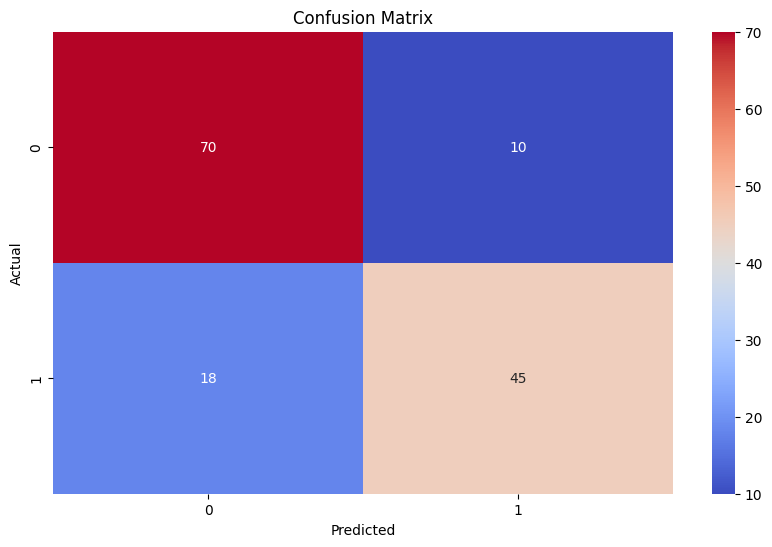

In [68]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [69]:
# Other Evaluation metrics
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1 Score:', f1)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8041958041958042
F1 Score: 0.7627118644067796
Precision: 0.8182
Recall: 0.7143


## SVM implementation

In [70]:
# Importing SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [71]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [72]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred), "\n")
print("Recall:", recall_score(y_test, y_pred), "\n")
print("Precision:", precision_score(y_test, y_pred), "\n")
print("F1 Score:", f1_score(y_test, y_pred), "\n")



Accuracy: 0.8251748251748252 

Recall: 0.7142857142857143 

Precision: 0.8653846153846154 

F1 Score: 0.782608695652174 



[[73  7]
 [18 45]]


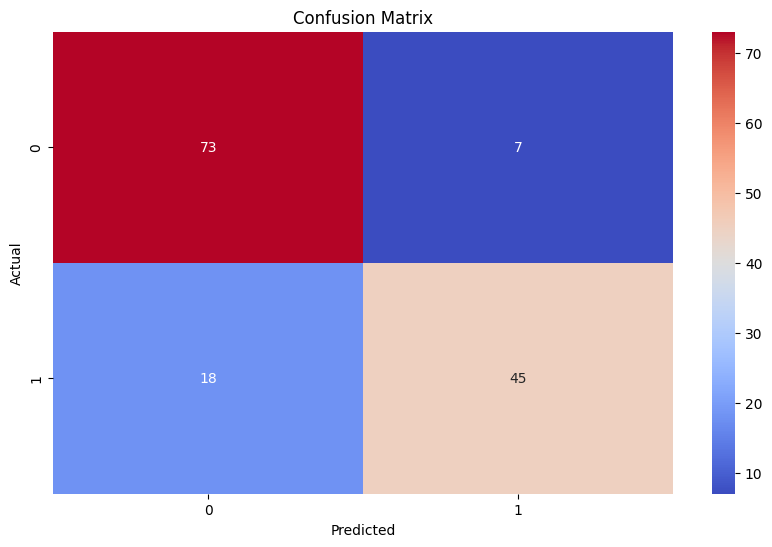

In [73]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

# Plotting the confusion matrix

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot = True, cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [74]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

# Create a dictionary of hyperparameters
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': kernel}

# Create a GridSearchCV object

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# Fit the model
grid.fit(X_train, y_train)

# Print the best hyperparameters
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.798 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.728 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.772 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.805 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.754 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.833 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.763 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.789 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.850 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

In [75]:
# Model Evaluation

print("Accuracy:", accuracy_score(y_test, grid_predictions), "\n")
print("Recall:", recall_score(y_test, grid_predictions), "\n")
print("Precision:", precision_score(y_test, grid_predictions), "\n")
print("F1 Score:", f1_score(y_test, grid_predictions), "\n")

Accuracy: 0.8181818181818182 

Recall: 0.7142857142857143 

Precision: 0.8490566037735849 

F1 Score: 0.7758620689655172 



In [76]:
# Comparing differnt kernel models' metrics

accuracies = []
precisions = []
recalls = []
f1_scores = []


for s in kernel:
    model = SVC(kernel = s)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

    

In [77]:
# Create a dataframe of the metrics
svm_metrics = pd.DataFrame({'Kernel': kernel, 'Accuracy': accuracies, 'Precision': precisions, 'Recall': recalls, 'F1 Score': f1_scores})

print(svm_metrics)

    Kernel  Accuracy  Precision    Recall  F1 Score
0   linear  0.748252   0.764706  0.619048  0.684211
1     poly  0.769231   0.812500  0.619048  0.702703
2      rbf  0.825175   0.865385  0.714286  0.782609
3  sigmoid  0.657343   0.634615  0.523810  0.573913


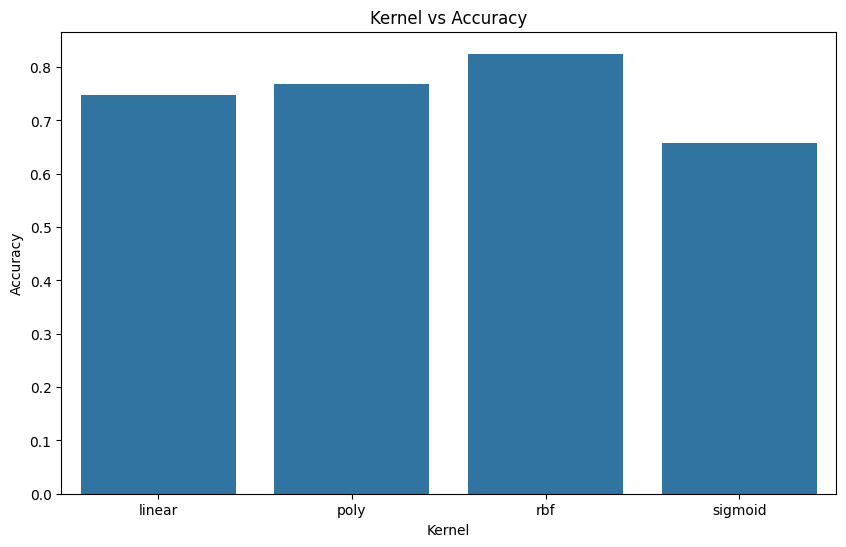

In [78]:
# Plotting a bar chart of the kernel vs the accuracy

plt.figure(figsize=(10, 6))
sns.barplot(x='Kernel', y='Accuracy', data=svm_metrics)
plt.title('Kernel vs Accuracy')
plt.show()


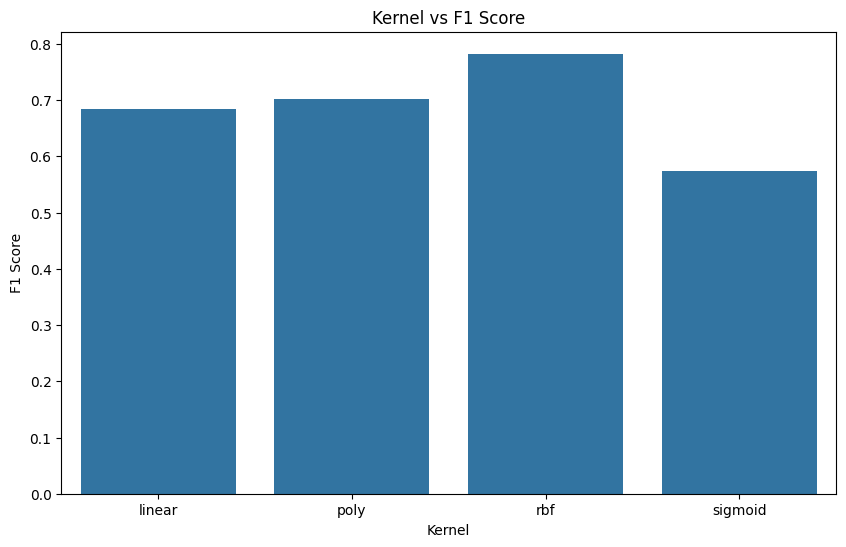

In [79]:
# Plotting a bar chart of the kernel vs the f1 score

plt.figure(figsize=(10, 6))
sns.barplot(x='Kernel', y='F1 Score', data=svm_metrics)
plt.title('Kernel vs F1 Score')
plt.show()

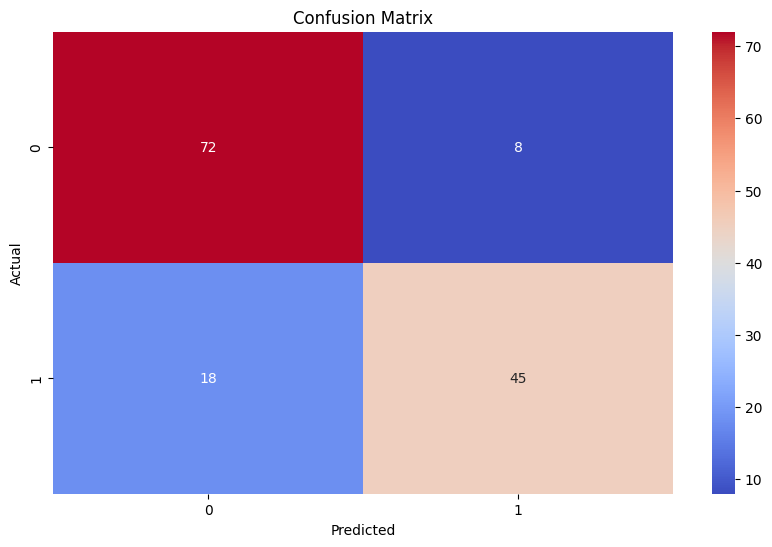

In [80]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, grid_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot = True, cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## XGBoost Implementation

In [81]:
# Importing XGBoostClassifier

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# XGBoost Model with decision tree as base learner
xgb_model = XGBClassifier(objective="binary:logistic", booster="gbtree",  n_estimators=50, eta=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)


Accuracy: 0.7832167832167832
Recall: 0.6666666666666666
Precision: 0.8076923076923077
F1 Score: 0.7304347826086957
Confusion Matrix:
[[70 10]
 [21 42]]


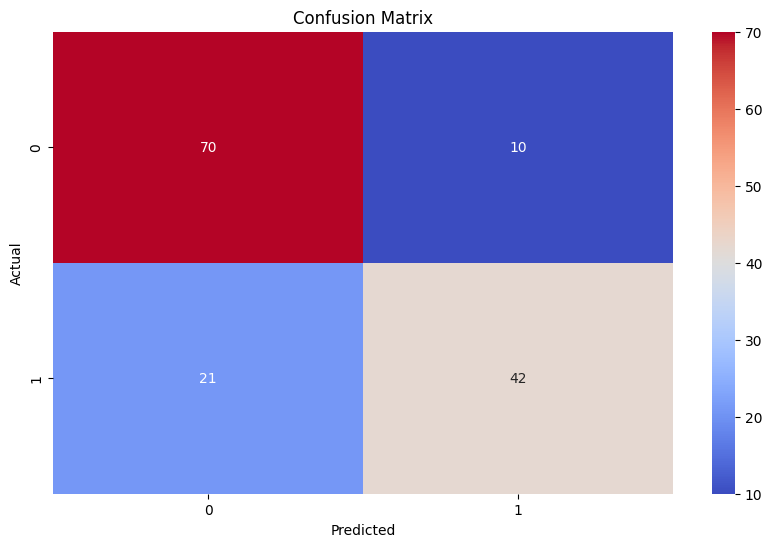

In [82]:
# Model Evaluation - Before Hyperparameter Tuning
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [83]:
# Hyperparameter Tuning

# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create a dictionary of hyperparameters
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "learning_rate": [0.1, 0.3, 0.5],  # Learning rate
    "max_depth": [3, 5, 8],  # Maximum depth of trees
    "min_child_weight": [1, 3, 5],  # Pruning parameter: Minimum samples per leaf
}
# Create a GridSearchCV object
grid = GridSearchCV(XGBClassifier(objective="binary:logistic", booster="gbtree"), param_grid, refit = True, verbose = 3)

# Fit the model
grid.fit(X_train, y_train)

# Print the best hyperparameters
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50;, score=0.789 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50;, score=0.833 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50;, score=0.798 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50;, score=0.807 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50;, score=0.796 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100;, score=0.807 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100;, score=0.807 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100;, score=0.842 total time=   0.0s
[CV 4/5] END learning_r

In [84]:
# Model Evaluation - After Hyperparameter Tuning
print("Accuracy:", accuracy_score(y_test, grid_predictions))
print("Recall:", recall_score(y_test, grid_predictions))
print("Precision:", precision_score(y_test, grid_predictions))
print("F1 Score:", f1_score(y_test, grid_predictions))
print("Confusion Matrix:")

print(confusion_matrix(y_test, grid_predictions))


Accuracy: 0.7902097902097902
Recall: 0.6507936507936508
Precision: 0.8367346938775511
F1 Score: 0.7321428571428571
Confusion Matrix:
[[72  8]
 [22 41]]


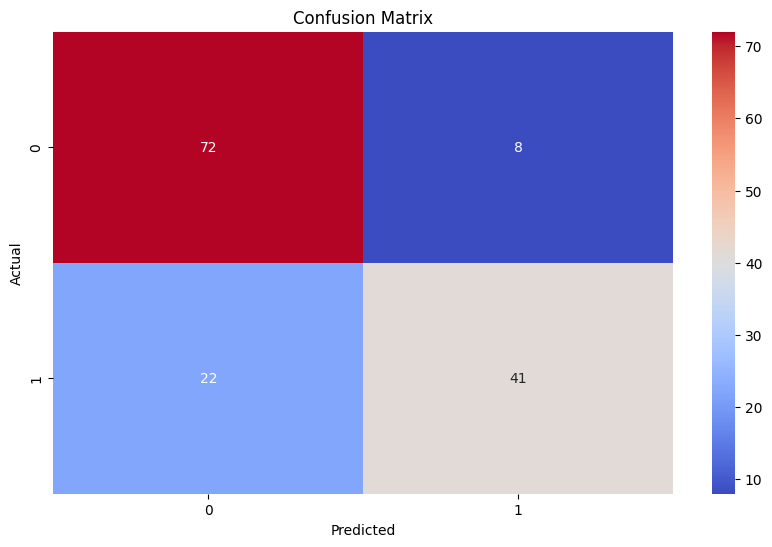

In [85]:

# Confusion Matrix

conf_matrix = confusion_matrix(y_test, grid_predictions)

# Plotting the confusion matrix

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot = True, cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
